
 ________________________ELBOW METHOD_______________________



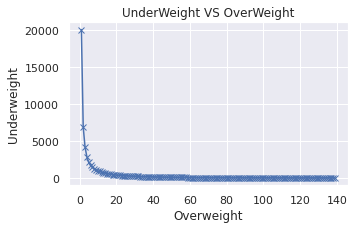




 _______________________CLUSTRING_KMEANS_ALGO_______________________



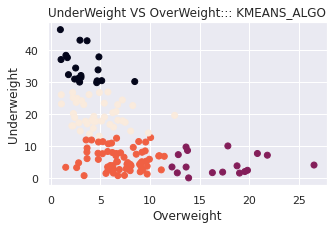


______Compute data proximity from each other using Nearest Neighbours______
___to find the value of EPS____


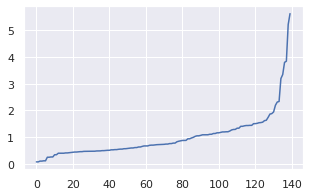




 _______________________CLUSTRING_DBSCAN_______________________



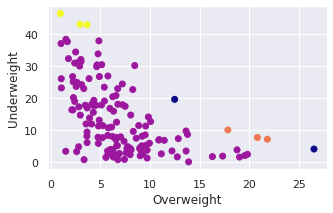

In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

World_population = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Gill/123/main/country-wise-average.csv')
World_population=World_population.dropna()
x_overweight=np.array(World_population[['Overweight']])
y_underweight=np.array(World_population[['Underweight']])
X = np.array(list(zip(x_overweight,y_underweight))).reshape(len(x_overweight), 2)
inertias = []
for i in range(1,140):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
print("\n ________________________ELBOW METHOD_______________________\n")
plt.plot(range(1,140), inertias, marker='x')
plt.title('UnderWeight VS OverWeight')
plt.xlabel('Overweight')
plt.ylabel('Underweight')
plt.show()
print("\n")
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print("\n _______________________CLUSTRING_KMEANS_ALGO_______________________\n")
plt.scatter(x_overweight, y_underweight, c=kmeans.labels_)
plt.title('UnderWeight VS OverWeight::: KMEANS_ALGO')
plt.xlabel('Overweight')
plt.ylabel('Underweight')
plt.show()
print("\n______Compute data proximity from each other using Nearest Neighbours______\n___to find the value of EPS____")

neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(X) 
distances,indices=nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 
print("\n")
print("\n _______________________CLUSTRING_DBSCAN_______________________\n")
dbscan = DBSCAN(eps = 4, min_samples = 2).fit(X) # fitting the model
labels = dbscan.labels_ 
plt.scatter(x_overweight, y_underweight, c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Overweight") 
plt.ylabel("Underweight") 
plt.show()